In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [17]:
import os
from PIL import Image
import pandas as pd

image_dir = "age_prediction/crop_part1"  


images = []
ages = []
genders = []

# Loop through images
for filename in os.listdir(image_dir)[:8000]:
    try:
        age, gender = map(int, filename.split("_")[:2])
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path).convert("RGB")

        ages.append(age)
        genders.append(gender)
        images.append(img)

    except Exception as e:
        print(f"Skipping file {filename}: {e}")

# Create a DataFrame
df = pd.DataFrame({
    "Images": images,
    "Ages": ages,
    "Genders": genders
})

df.head()


,Images,Ages,Genders
0,<PIL.Image.Image image mode=RGB size=200x200 a...,85,1
1,<PIL.Image.Image image mode=RGB size=200x200 a...,4,1
2,<PIL.Image.Image image mode=RGB size=200x200 a...,2,1
3,<PIL.Image.Image image mode=RGB size=200x200 a...,4,1
4,<PIL.Image.Image image mode=RGB size=200x200 a...,4,1


In [20]:
df['Genders'].value_counts()

Genders
1    4461
0    3539
Name: count, dtype: int64

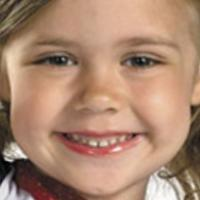

4 1


In [23]:
display(df['Images'][1])
print(df['Ages'][1],df['Genders'][1])

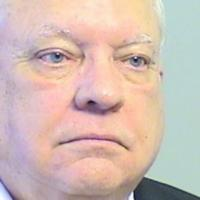

66 0


In [26]:
display(df['Images'][7000])
print(df['Ages'][7000], df['Genders'][7000])

<Axes: xlabel='Ages', ylabel='Count'>

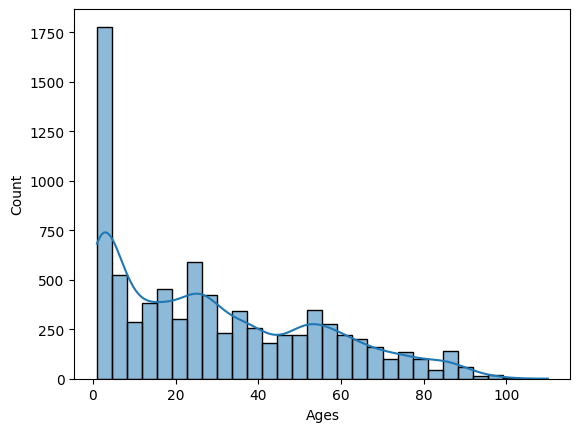

In [27]:
sns.histplot(df['Ages'],kde=True,bins=30)

In [28]:
under4s = []

for i in range(len(df)):
    if df['Ages'].iloc[i] <= 4:
        under4s.append(df.iloc[i])
under4s = pd.DataFrame(under4s)
under4s = under4s.sample(frac = 0.3)

df = df[df['Ages'] > 4]
df = pd.concat([df,under4s],ignore_index = True)

<Axes: xlabel='Ages', ylabel='Count'>

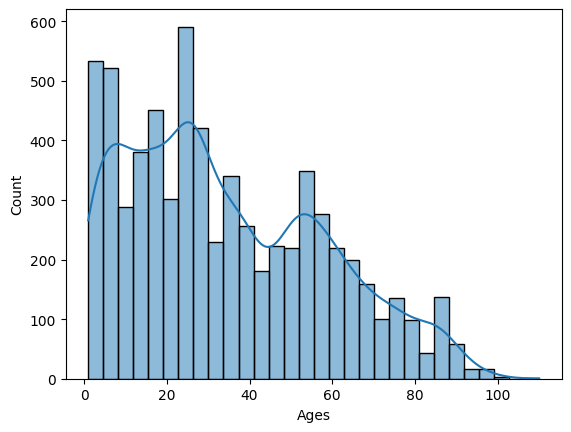

In [30]:
sns.histplot(df['Ages'],kde=True, bins=30)